# GradCAM from Captum Library implementation

In [2]:
from torchvision.models import resnet
import torchvision.transforms as transforms
from torchvision import datasets

import torch
from torch.utils.data import DataLoader, Dataset
from captum.attr import GuidedGradCam, IntegratedGradients

import kagglehub

import os
import numpy as np
import matplotlib.pyplot as plt

from utils.plot import plot_random_six_images, plot_idx_labeled, plot_with_function
from utils.metric_functions import test_on_given_idx

## Data

In [ ]:
# Download latest version
DATA_PATH = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")
IMG_PATH = os.path.join(DATA_PATH, "images", "Images")
ANNOTATION_PATH = os.path.join(DATA_PATH, "annotations", "Annotations")

print("Path to dataset files:", DATA_PATH)

dataset = datasets.ImageFolder(root=IMG_PATH)

### Transform, set and Loader
Normalization is done with standard image net $\mu$ and $\sigma$

In [23]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean, std)])

# Images and Predictions

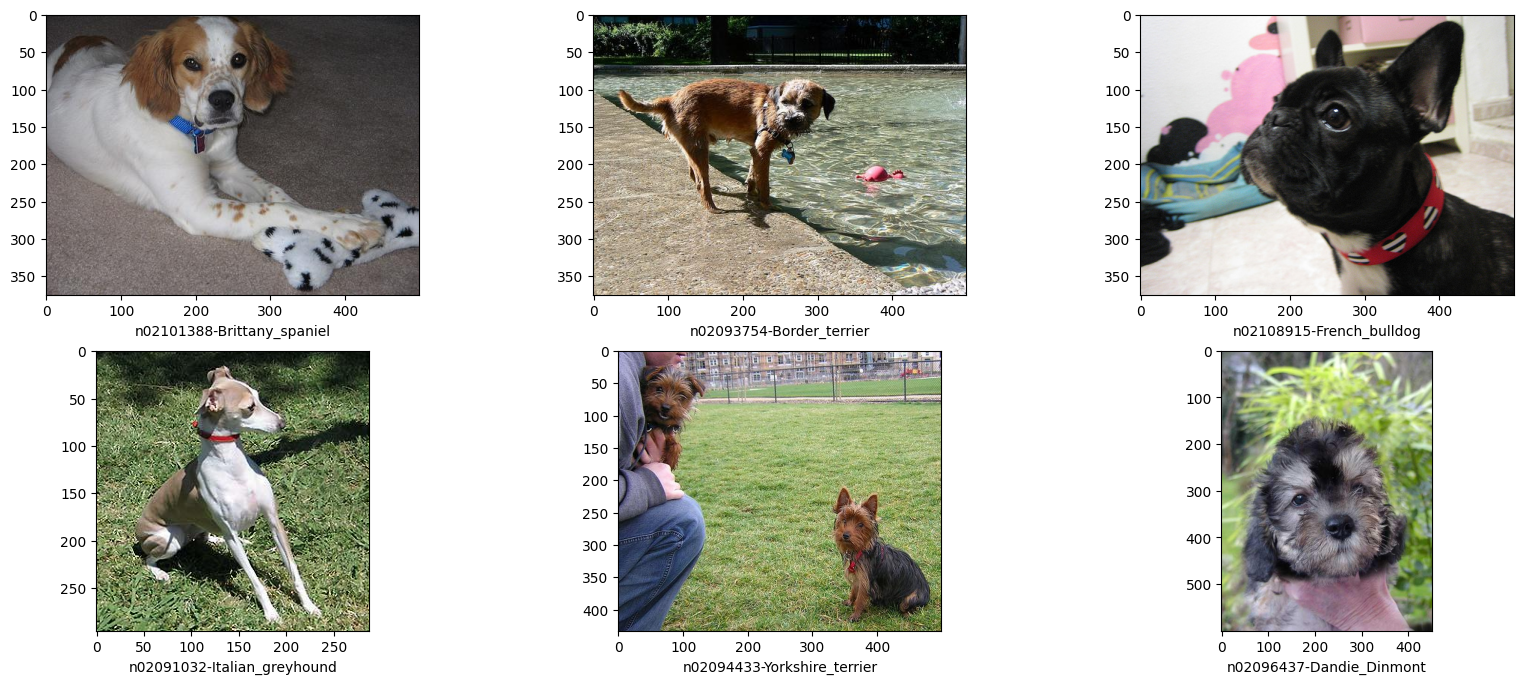

In [5]:
idx = plot_random_six_images(dataset, dataset.classes)

## Loding Model and Prediction

In [6]:
MODEL_NAME = 'resnet18_dogs_5_epochs'

net_model = resnet.resnet18()
net_model.load_state_dict(torch.load(os.path.join('models', f"{MODEL_NAME}.pth"), weights_only=True))

preds, df = test_on_given_idx(dataset, net_model,transform, idx=idx)

df

Idx                   True_Label              Predicted_Label
0  11352   n02101388-Brittany_spaniel   n02101388-Brittany_spaniel
1   5751     n02093754-Border_terrier     n02093754-Border_terrier
2  16106     n02108915-French_bulldog     n02108915-French_bulldog
3   3653  n02091032-Italian_greyhound  n02091032-Italian_greyhound
4   6580  n02094433-Yorkshire_terrier  n02094433-Yorkshire_terrier
5   7835     n02096437-Dandie_Dinmont     n02096437-Dandie_Dinmont

array([11352,  5751, 16106,  3653,  6580,  7835])

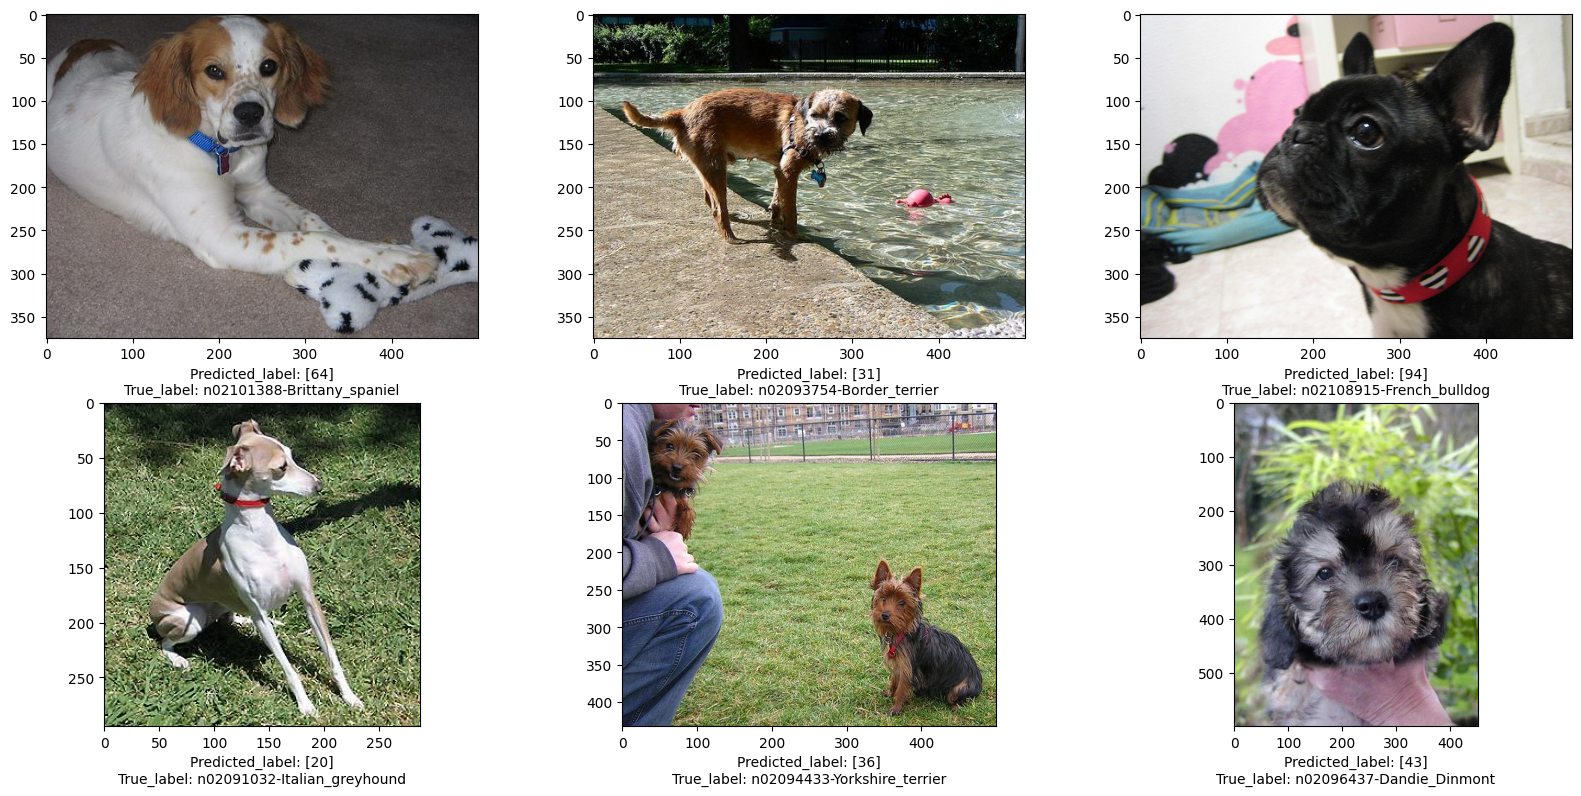

In [7]:
plot_idx_labeled(idx,preds,dataset)

# GradCAM

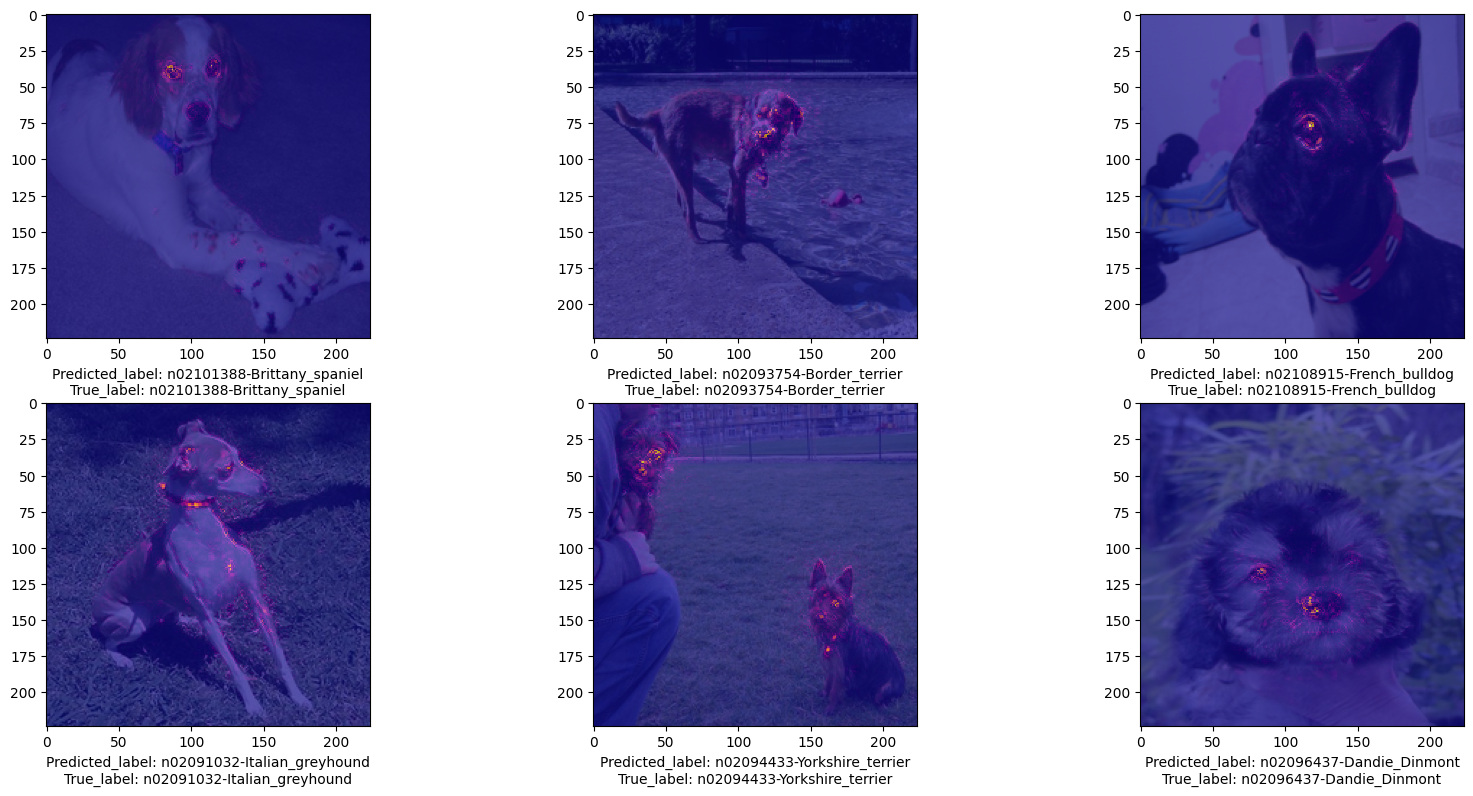

In [11]:
guided_gc = GuidedGradCam(net_model.cpu(), net_model.layer4)
plot_with_function(idx, preds, dataset, guided_gc.attribute, transform=transform)

# Intagrated Gradients

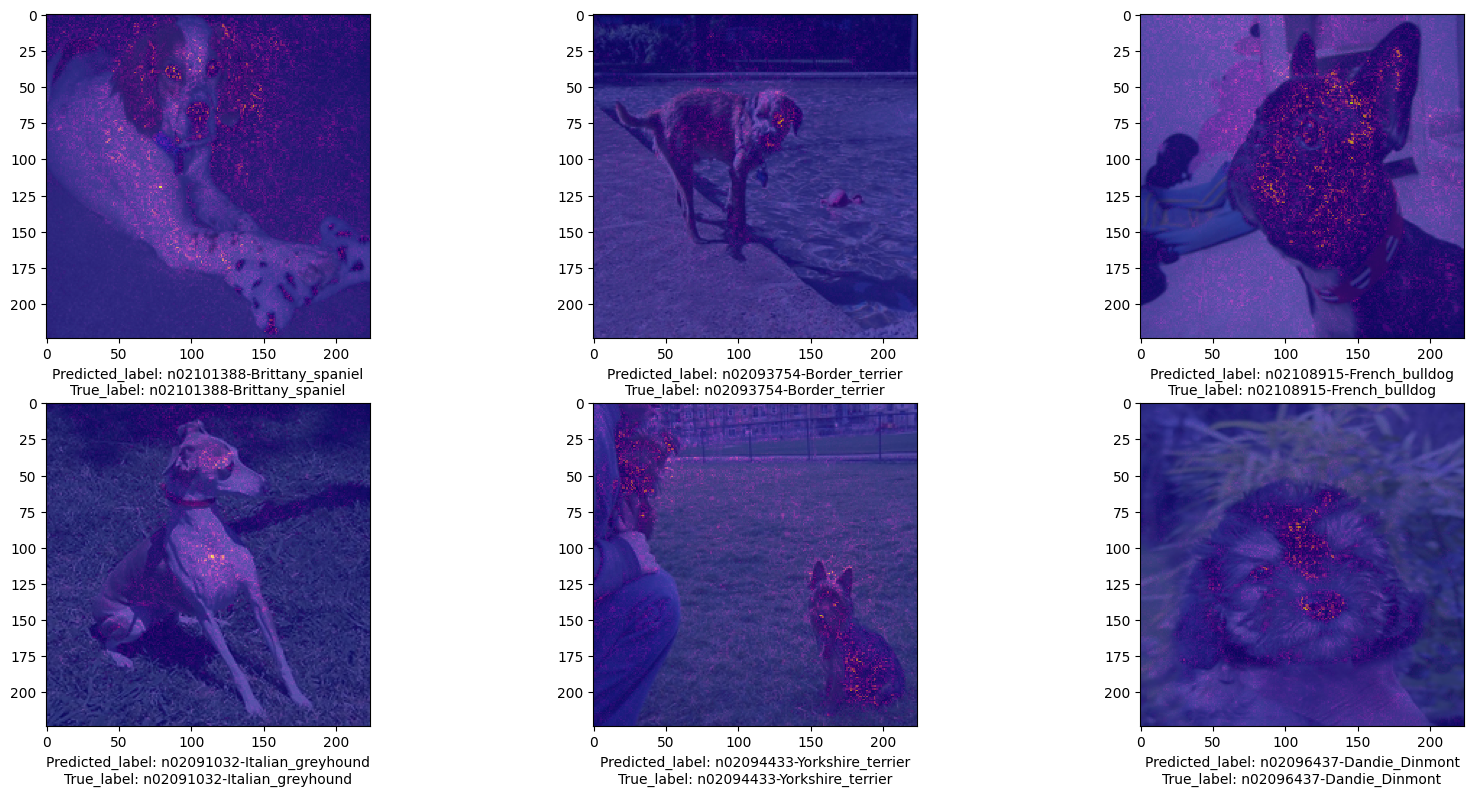

In [13]:
ic = IntegratedGradients(net_model.cpu(), net_model.layer4)
plot_with_function(idx, preds, dataset, ic.attribute, transform=transform)